In [81]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

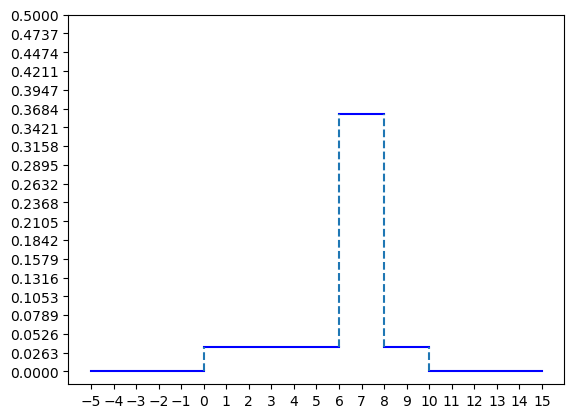

In [151]:
# Problem 1(b)
x_1 = np.linspace(-5,0,100)
x_2 = np.linspace(0, 6,100)
x_3 = np.linspace(6, 8,100)
x_4 = np.linspace(8, 10, 100)
x_5 = np.linspace(10,15, 100)

plt.plot(x_1, 0 * np.ones(len(x_1)), c = "b", linestyle="-")
plt.plot(x_2, 5 / 144 * np.ones(len(x_2)), c = "b", linestyle="-")
plt.plot(x_3, 13 / 36 * np.ones(len(x_3)), c = "b", linestyle="-")
plt.plot(x_4, 5 / 144 * np.ones(len(x_4)), c = "b", linestyle="-")
plt.plot(x_5, 0 * np.ones(len(x_5)), c = "b", linestyle="-")
plt.vlines(0, ymin = 0, ymax = 5 /144, linestyle="--")
plt.vlines(6, ymin = 5 / 144 , ymax = 13 / 36, linestyle="--")
plt.vlines(8, ymin = 5 / 144, ymax = 13 / 36, linestyle="--")
plt.vlines(10, ymin = 0, ymax = 5 /144, linestyle="--")
plt.yticks(np.linspace(0,0.5,20))
plt.xticks(np.linspace(-5,15,21))
plt.show()

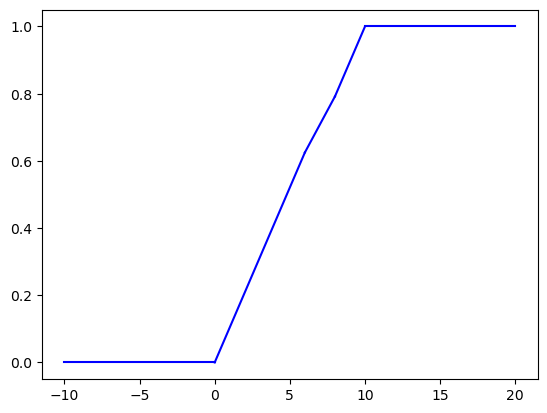

In [161]:
# Problem 1(c)
def generate_piece_wise_function(v):
    
    if v == 0:
        return lambda x:0
    elif v == 1:
        return lambda x: (5 / 48) * x
    elif v == 2:
        return lambda x: (1 / 12) * x + 1 / 8
    elif v == 3:
        return lambda x: (5 / 48) * x - 1 / 24
    else:
        return lambda x: 1

    
def plot_piece_wise_function(pieces):
    
    for index, piece in enumerate(pieces):
        func = generate_piece_wise_function(index)
        plt.plot(piece, [func(y) for y in piece],c = "blue")
    
    plt.show()
    
    
pieces = [np.linspace(-10,0)
        ,np.linspace(0,6)
        ,np.linspace(6,8)
        ,np.linspace(8,10)
        ,np.linspace(10,20)]
    
plot_piece_wise_function(pieces)

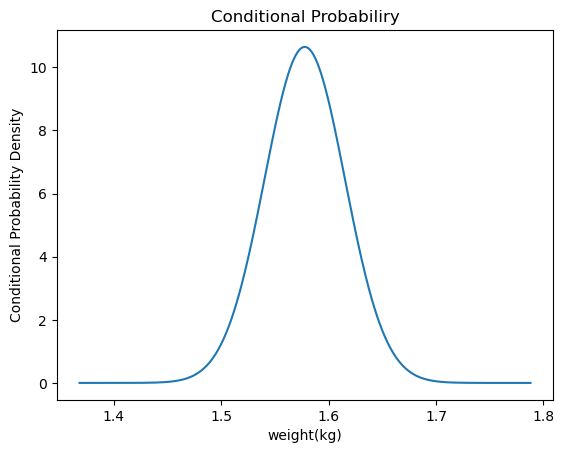

In [80]:
# Problem 3(b)

# A trick here, we reverse the order of the feature, only to apply the multi-dimensional gaussian 
# estimate quickly
raw_data = np.array(list(reversed([[1.5, 2.3, 0.8, 1.2, 2.0, 1.2, 0.7, 2.7, 2.3, 0.6]
                 ,[20, 15, 18, 19 , 17 , 22 , 21 , 14 , 17 , 22]
                 ,[8, 12, 6,  10,  17,  12,  9,  14,  10,  8 ]
                 ,[110, 94, 152, 123, 78, 60, 111, 83, 85, 90]
                 ,[12, 21, 9, 14, 19, 15, 7, 29, 22, 15]
                ])))
data = raw_data.T
n = data.shape[0]
condition_x = np.array([15, 20, 120, 8])


# Mean Vector
mu_MLE = 1 / n * data.sum(axis = 0)
# Covariance matrix
Sigma_MLE = 1 / n * (data - mu_MLE).T @ (data - mu_MLE)


sub_mu_MLE_y = mu_MLE[4:]  # (1,)   y 
sub_mu_MLE_x = mu_MLE[:4]  # (4,)   x

sub_Sigma_MLE_y = Sigma_MLE[4:,4:]                  # (4,1)  y
sub_Sigma_MLE_yx = Sigma_MLE[:4,4:]                 # (x,y)
sub_Sigma_MLE_x = np.linalg.inv(Sigma_MLE[:4,:4])   # (4,4)   x
 
# Compute conditional model, parametrized by mu_cond and sigma_cond
mu_cond = sub_mu_MLE_y + sub_Sigma_MLE_yx.T 
            @ sub_Sigma_MLE_x 
            @ (condition_x - sub_mu_MLE_x)
sigma_cond = (sub_Sigma_MLE_y - sub_Sigma_MLE_yx.T 
            @ sub_Sigma_MLE_x 
            @ sub_Sigma_MLE_yx)[0][0]



# Generate the conditional probability
us = np.linspace(1.578 - 0.03 * 7,1.578 + 0.03 * 7,500)
plt.plot(us, norm.pdf(us, mu_cond, sigma_cond))
plt.xlabel("weight(kg)")
plt.ylabel("Conditional Probability Density")
plt.title("Conditional Probabiliry")
plt.show()

In [73]:
mu_cond

array([1.57772945])

In [74]:
sigma_cond

0.03747546420415787

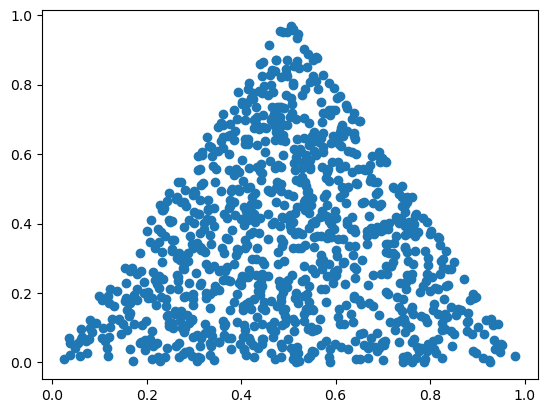

In [13]:
# Problem 4
# Generate jointly distributed samples from independent uniform distribution
def generate_one_sample(inverse_CDF_u1, inverse_CDF_u2):
    u1 = generate_u1(inverse_CDF_u1)
    u2 = generate_u2(inverse_CDF_u2, u1) 
    return u1, u2
    
# Just for this problem
def define_inverse_CDF():
    func_u1 = lambda x: 1 - np.sqrt(1 - x)
    func_u2 = lambda x, y: (1 - y) * x + (1 / 2) * y
    
    return func_u1, func_u2

# Apply Inverse Sampling 
def generate_u1(inverse_CDF):
    u = np.random.uniform(0,1,1)
    return inverse_CDF(u)

# Applying Inverse Sampling, Conditional Probability
def generate_u2(inverse_CDF, u1):
    u = np.random.uniform(0,1,1)
    return inverse_CDF(u, u1)

def draw_scatter_plot(data):
    # Since we first generate y, then x.
    plt.scatter(data[:,1], data[:,0])
    plt.show()

def main_procedure(sample_size = 1000):
    sample_points = []
    inverse_CDF_u1, inverse_CDF_u2 = define_inverse_CDF()
    for i in range(sample_size):
        sample_points.append([*generate_one_sample(inverse_CDF_u1, inverse_CDF_u2)])
    
    data = np.array(sample_points)
    draw_scatter_plot(data)
    
main_procedure(1000)